In [121]:
import pandas as pd
import json
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.decomposition import PCA

In [122]:
with open('grandmasterData.json') as f:
  gdData = f.read()
gdDict = json.loads(gdData)

In [123]:
placements = []
traits = []
augments = []
units = []

for summonerID in gdDict.keys():
  for i in range(len(gdDict[summonerID])):
    for puuid, dataDict in gdDict[summonerID][i].items():
      placements.append(dataDict["placement"])
      traits.append(dataDict["traits"])
      augments.append(dataDict["augments"])
      units.append(dataDict["units"])
    # break
  # break
df = pd.DataFrame()
df["placement"] = placements
df["traits"] = traits
df["augments"] = augments
df["units"] = units

df.head()

,placement,traits,augments,units
0,4,"[Set10_Brawler, Set10_Classical, Set10_Country...","[TFT9_Augment_DravenSpoilsOfWar, TFT9_Augment_...","[TFT10_Bard, TFT10_Aphelios, TFT10_MissFortune..."
1,8,"[Set10_Brawler, Set10_Breakout, Set10_Dazzler,...","[TFT7_Augment_AFK, TFT10_Augment_Determinedinv...","[TFT10_KSante, TFT10_Senna, TFT10_Lulu, TFT10_..."
2,3,"[Set10_8Bit, Set10_Brawler, Set10_CrowdDive, S...","[TFT9_Augment_OneTwosThree, TFT9_Augment_Great...","[TFT10_MissFortune, TFT10_Sett, TFT10_Zac, TFT..."
3,6,"[Set10_CrowdDive, Set10_Edgelord, Set10_Execut...","[TFT9_Augment_CustomerIsAlwaysRight, TFT9_Augm...","[TFT10_Lillia, TFT10_Gnar, TFT10_Kayle, TFT10_..."
4,7,"[Set10_Deadeye, Set10_Guardian, Set10_Hyperpop...","[TFT9_Augment_SilverSpoon, TFT9_Augment_Pandor...","[TFT10_Lillia, TFT10_Kennen, TFT10_Seraphine, ..."


In [124]:
mlb = MultiLabelBinarizer()
df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('traits')),
                                            columns=mlb.classes_,
                                            index=df.index).add_prefix("trait_"))

df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('units')),
                                            columns=mlb.classes_,
                                            index=df.index).add_prefix("unit_"))

df = df.join(pd.DataFrame(mlb.fit_transform(df.pop('augments')),
                                            columns=mlb.classes_,
                                            index=df.index).add_prefix("augment_"))
df.head()

,placement,trait_Astro,trait_Battlecast,trait_Blaster,trait_Chrono,trait_Cybernetic,trait_DarkStar,trait_Demolitionist,trait_Infiltrator,trait_ManaReaver,...,augment_TFT9_Augment_TiniestTitan,augment_TFT9_Augment_TiniestTitanPlus,augment_TFT9_Augment_TonsOfStats,augment_TFT9_Augment_TwoHealthy,augment_TFT9_Augment_UnleashedArcana,augment_TFT9_Augment_WhatDoesntKillYou,augment_TFT9_Augment_WhatTheForge,augment_TFT9_Augment_YouHaveMyBow,augment_TFT9_Augment_YouHaveMySword,augment_TFT9_Augment_YoungAndWildAndFree
0,4,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [139]:
def plotPCA(df, target, binary=False):
    features = list(df.columns)
    features.remove(target)

    pca = PCA(n_components=2)
    components = pca.fit_transform(df[features])

    PC1 = components[:,0]
    PC2 = components[:,1]

    zipped = list(zip(PC1,
                      PC2,
                      df[target]))

    pc_df = pd.DataFrame(zipped,
                         columns=['PC1',
                                  'PC2',
                                  target])

    fig, ax = plt.subplots(figsize=(12,7))

    if binary:
        sns.scatterplot(data=pc_df,
                        x="PC1",
                        y="PC2",
                        hue=target,
                        linewidth=0,
                        s=5)
    else:
        sns.scatterplot(data=pc_df,
                        x="PC1",
                        y="PC2",
                        hue=target,
                        linewidth=0,
                        s=5,
                        legend=False)


    plt.title("TFT PCA",
              fontsize=16)
    plt.xlabel('First Principal Component',
               fontsize=16)
    plt.ylabel('Second Principal Component',
               fontsize=16)

    if not binary:
        norm = plt.Normalize(pc_df[target].min(), pc_df[target].max())
        cmap = sns.cubehelix_palette(n_colors=2, light=1, as_cmap=True)
        sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
        sm.set_array([])

        cax = fig.add_axes([ax.get_position().x1+0.05, ax.get_position().y0, 0.06, ax.get_position().height / 2])
        ax.figure.colorbar(sm, cax=cax)

    plt.show()

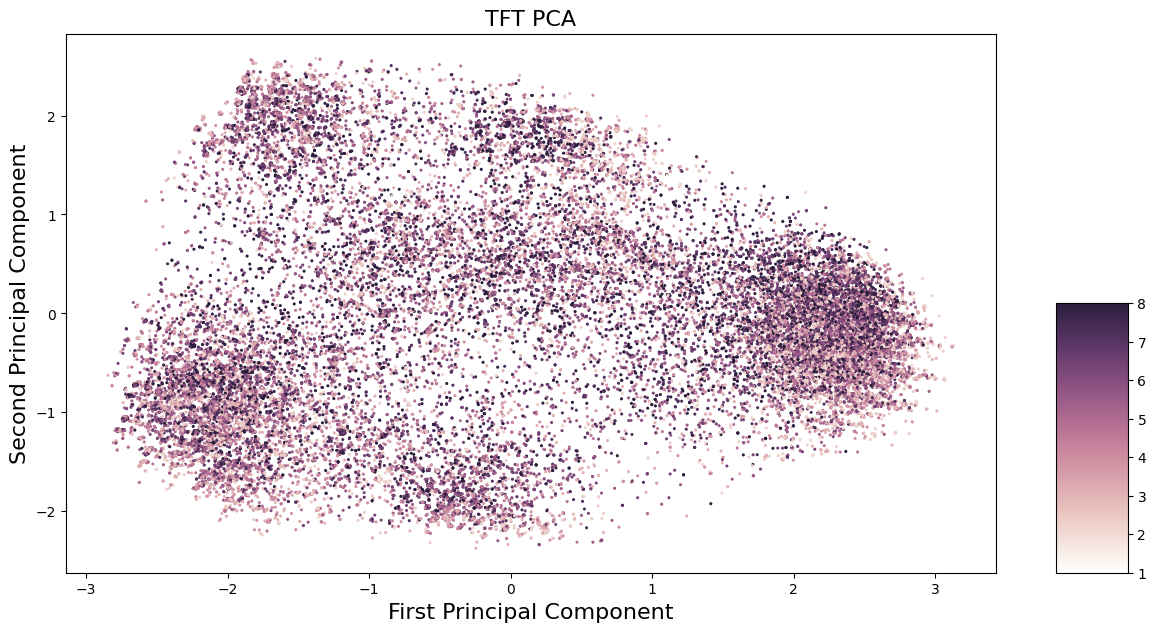

In [140]:
plotPCA(df, "placement")

In [127]:
top4DF = df.copy()

for i, row in top4DF.iterrows():
    if row["placement"] > 4:
        top4DF.at[i,"placement"] = 1
    else:
        top4DF.at[i,"placement"] = 0

top4DF.head()

,placement,trait_Astro,trait_Battlecast,trait_Blaster,trait_Chrono,trait_Cybernetic,trait_DarkStar,trait_Demolitionist,trait_Infiltrator,trait_ManaReaver,...,augment_TFT9_Augment_TiniestTitan,augment_TFT9_Augment_TiniestTitanPlus,augment_TFT9_Augment_TonsOfStats,augment_TFT9_Augment_TwoHealthy,augment_TFT9_Augment_UnleashedArcana,augment_TFT9_Augment_WhatDoesntKillYou,augment_TFT9_Augment_WhatTheForge,augment_TFT9_Augment_YouHaveMyBow,augment_TFT9_Augment_YouHaveMySword,augment_TFT9_Augment_YoungAndWildAndFree
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


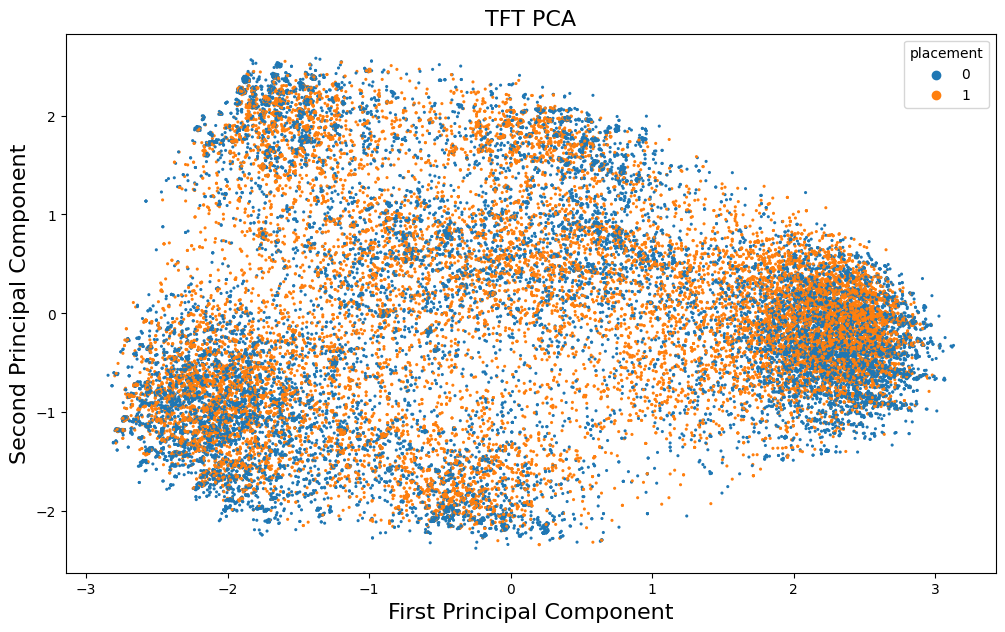

In [141]:
plotPCA(top4DF, "placement", binary=True)

- Explore Loadings
- Explore Explained Variance
- Latticed PCA Plot